In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df.target.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Hmmm, it's not neccesary to scale in this dataset**

In [6]:
X = df.drop(['target','target_names'],axis=1)
Y = df.target

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0)
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [8]:
np.unique(Y_train, return_counts=True)

(array([0, 1, 2]), array([34, 32, 39], dtype=int64))

# Training

In [9]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski', p=2)
knn.fit(X_train, Y_train)

knn.score(X_train, Y_train), knn.score(X_test, Y_test)

(1.0, 0.9777777777777777)

In [10]:
Yp_test = knn.predict(X_test)
confusion_matrix(Y_test, Yp_test)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

# Visualization

In [11]:
df2 = pd.DataFrame(X_test,columns=iris.feature_names)
df2['target'] = Y_test
df2['target_test'] = Yp_test

In [12]:
df2_target_0 = df2[df2.target==0]
df2_target_1 = df2[df2.target==1]
df2_target_2 = df2[df2.target==2]

In [13]:
df2_target_test_0 = df2[df2.target_test==0]
df2_target_test_1 = df2[df2.target_test==1]
df2_target_test_2 = df2[df2.target_test==2]

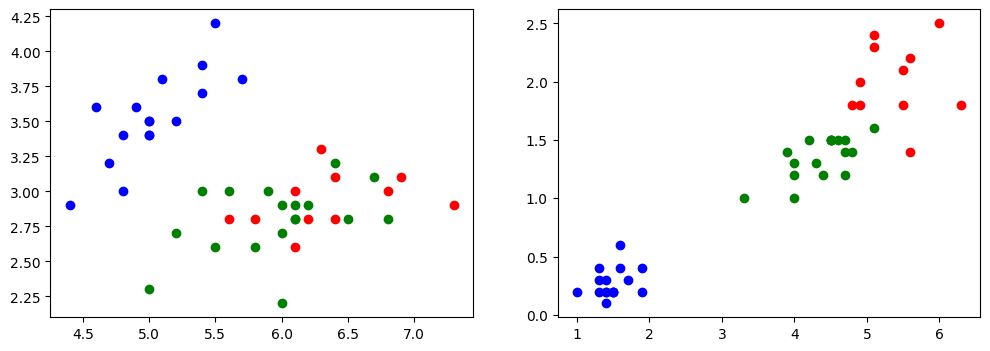

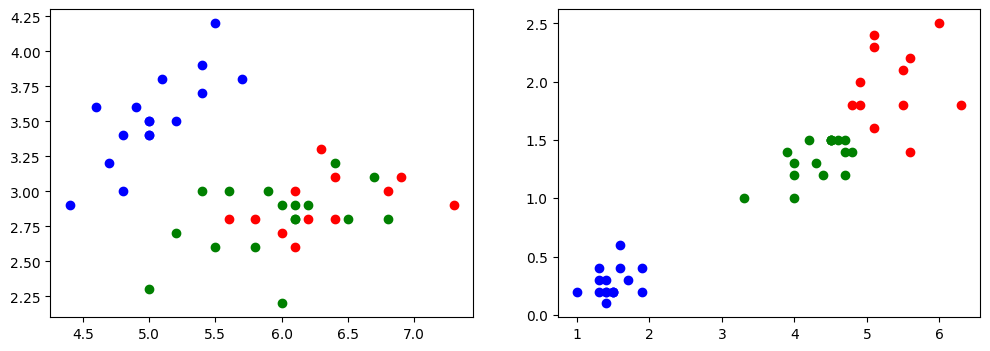

In [14]:
fig1, (sub1,sub2) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sub1.scatter(df2_target_0['sepal length (cm)'],df2_target_0['sepal width (cm)'],color='blue')
sub1.scatter(df2_target_1['sepal length (cm)'],df2_target_1['sepal width (cm)'],color='green')
sub1.scatter(df2_target_2['sepal length (cm)'],df2_target_2['sepal width (cm)'],color='red')

sub2.scatter(df2_target_0['petal length (cm)'],df2_target_0['petal width (cm)'],color='blue')
sub2.scatter(df2_target_1['petal length (cm)'],df2_target_1['petal width (cm)'],color='green')
sub2.scatter(df2_target_2['petal length (cm)'],df2_target_2['petal width (cm)'],color='red')


fig2, (sub1,sub2) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sub1.scatter(df2_target_test_0['sepal length (cm)'],df2_target_test_0['sepal width (cm)'],color='blue')
sub1.scatter(df2_target_test_1['sepal length (cm)'],df2_target_test_1['sepal width (cm)'],color='green')
sub1.scatter(df2_target_test_2['sepal length (cm)'],df2_target_test_2['sepal width (cm)'],color='red')

sub2.scatter(df2_target_test_0['petal length (cm)'],df2_target_test_0['petal width (cm)'],color='blue')
sub2.scatter(df2_target_test_1['petal length (cm)'],df2_target_test_1['petal width (cm)'],color='green')
sub2.scatter(df2_target_test_2['petal length (cm)'],df2_target_test_2['petal width (cm)'],color='red')